<a href="https://colab.research.google.com/github/hwangsaeyeon/AAI-Web-Development/blob/main/DNN_predict_victory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)

y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      5440 non-null   float64
 1   A1      5448 non-null   float64
 2   A2      5449 non-null   float64
 3   A3      5449 non-null   float64
 4   A4      5420 non-null   float64
 5   A5      5443 non-null   float64
 6   A6      5448 non-null   float64
 7   A7      5442 non-null   float64
 8   A8      5444 non-null   float64
 9   A9      5432 non-null   float64
 10  H0      5445 non-null   float64
 11  H1      5445 non-null   float64
 12  H2      5449 non-null   float64
 13  H3      5447 non-null   float64
 14  H4      5430 non-null   float64
 15  H5      5447 non-null   float64
 16  H6      5446 non-null   float64
 17  H7      5445 non-null   float64
 18  H8      5443 non-null   float64
 19  H9      5438 non-null   float64
dtypes: float64(20)
memory usage: 851.5 KB


In [ ]:
import numpy as np
x = x.replace(np.nan,0)

In [ ]:
X = { 'X_away' : x.iloc[:,0:10].sum(axis=1),
          'X_home' : x.iloc[:,10:].sum(axis=1) }

X = pd.DataFrame.from_dict(X)
X

,X_away,X_home
0,12.18,34.91
1,25.72,20.94
2,12.92,25.61
3,8.64,36.28
4,10.75,11.11
...,...,...
5444,8.22,15.71
5445,15.71,6.61
5446,14.65,6.37
5447,10.76,12.84


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3814, 2) (1635, 2)
(3814, 1) (1635, 1)


In [ ]:
import tensorflow as tf
input_shape = [X_train.shape[1]]
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

early_stop = tf.keras.callbacks.EarlyStopping(patience=1000)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=1000 ,validation_split=0.3,batch_size=512,callbacks=early_stop)
performance = model.evaluate(X_test, y_test, verbose=2)
print('정답률:',performance[1], 'loss:', performance[0])

Epoch 1/1000
6/6 [==============================] - 4s 97ms/step - loss: 0.9044 - accuracy: 0.5062 - val_loss: 0.8481 - val_accuracy: 0.4664
Epoch 2/1000
6/6 [==============================] - 0s 25ms/step - loss: 0.8923 - accuracy: 0.5111 - val_loss: 0.7676 - val_accuracy: 0.4664
Epoch 3/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.8973 - accuracy: 0.5058 - val_loss: 0.7332 - val_accuracy: 0.4681
Epoch 4/1000
6/6 [==============================] - 0s 20ms/step - loss: 0.8866 - accuracy: 0.5332 - val_loss: 0.7149 - val_accuracy: 0.4638
Epoch 5/1000
6/6 [==============================] - 0s 18ms/step - loss: 0.8972 - accuracy: 0.5137 - val_loss: 0.7037 - val_accuracy: 0.4699
Epoch 6/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.8961 - accuracy: 0.5122 - val_loss: 0.6969 - val_accuracy: 0.4873
Epoch 7/1000
6/6 [==============================] - 0s 36ms/step - loss: 0.8746 - accuracy: 0.5242 - val_loss: 0.6930 - val_accuracy: 0.4900
Epoch 8/1000


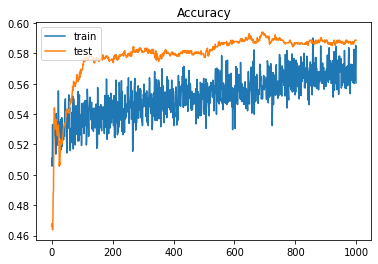

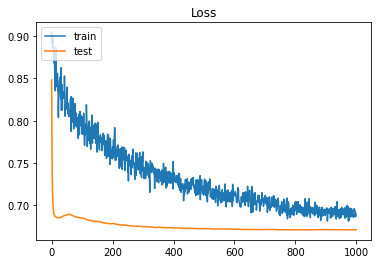

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()